-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Analiza bezpieczeństwa ekonomicznego europejczyków w latach 2002-2021

Przemysław Gaffka 76633

Dane pozyskane z: https://ec.europa.eu/eurostat/data/database

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Cel projektu: W warunkach rosnącej niepewności gospodarczej oraz dynamicznych zmian w światowej gospodarce, istotne jestzrozumienie, jak kształtuje się sytuacja ekonomiczna gospodarstw domowych.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Hipotezy:

Odsetek osób z zaległościami finansowymi w UE będzie wykazywał istotny trend czasowy w analizowanym okresie.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

KOD:

Import bibliotek

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

Import danych

In [85]:
arrears = pd.read_csv('Arrears.csv')
arrears.head()

,"""freq",hhtyp,incgrp,unit,"geo\TIME_PERIOD""",2003,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,"A,A1,A_MD60,PC,AL",:,:,:,:,:,:,:,:,:,...,28.6,26.1,23.9,27.5,:,:,NaN,NaN,NaN,NaN
1,"A,A1,A_MD60,PC,AT",2.3,3.7,2.7,2.4,2.8,3.9 b,4.0,4.6,4.2,...,3.1,2.9,3.5,4.8,5.5,:,NaN,NaN,NaN,NaN
2,"A,A1,A_MD60,PC,BE",7.9,7.7,5.7,4.8,4.7,4.4,5.8,6.4,4.9,...,2.8,2.9,3.3,4.5,3.1,:,NaN,NaN,NaN,NaN
3,"A,A1,A_MD60,PC,BG",:,:,14.8,14.8,18.3,27.8,29.1,26.4,21.4,...,16.2,16.3,14.9,14.8,14.5,12.9,NaN,NaN,NaN,NaN
4,"A,A1,A_MD60,PC,CH",:,:,:,:,7.3,4.5,5.3,4.4,4.9,...,5.2,4.6,4.2,5.3,5.4,:,NaN,NaN,NaN,NaN


Wyczyszczone dane

In [80]:
arrears_long = pd.read_csv("arrears_long_clean.csv")
arrears_long.head()

,freq,hhtyp,incgrp,unit,geo,year,value
0,A,A1,A_MD60,PC,AL,2003,NaN
1,A,A1,A_MD60,PC,AT,2003,2.8
2,A,A1,A_MD60,PC,BE,2003,4.7
3,A,A1,A_MD60,PC,BG,2003,18.3
4,A,A1,A_MD60,PC,CH,2003,7.3


-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Teza

In [86]:
eu_trend = arrears_long[(arrears_long['hhtyp'] == 'TOTAL') &
                                 (arrears_long['incgrp'] == 'TOTAL')].copy()

eu_trend["value"] = pd.to_numeric(eu_trend["value"])
eu_trend = eu_trend.dropna(subset=["value"])

eu_trend_yearly = eu_trend.groupby("year")["value"].mean().reset_index()

x = eu_trend_yearly["year"].values
y = eu_trend_yearly["value"].values

r = np.corrcoef(x, y)[0, 1]
n = len(x)

t_stat = r * np.sqrt((n - 2) / (1 - r**2))

print("Korelacja:", r)
print("Statystyka t:", t_stat)

Korelacja: -0.409780163245902
Statystyka t: -1.8522209551149544


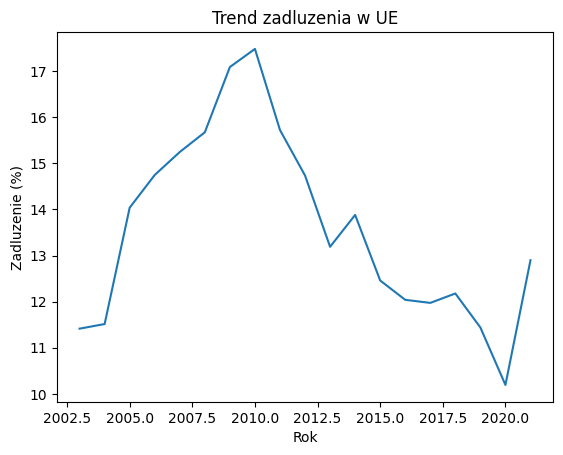

In [87]:
plt.figure()
plt.plot(x, y)
plt.title("Trend zadluzenia w UE")
plt.xlabel("Rok")
plt.ylabel("Zadluzenie (%)")
plt.show()

Wnioski:

Bazujac na wynikach mozna zauważyć trend ujemny, jednak stopień zadluzenia wykazuje się sporą zmiennością. Możemy zauważyć że spokojniejszych okresach (2012-2020) liczba maleje, jednak w oblicu kryzysów (finansowy 2008, oraz covid-19) mieszkańct UE się zadlużają

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

MSE: 1.4714


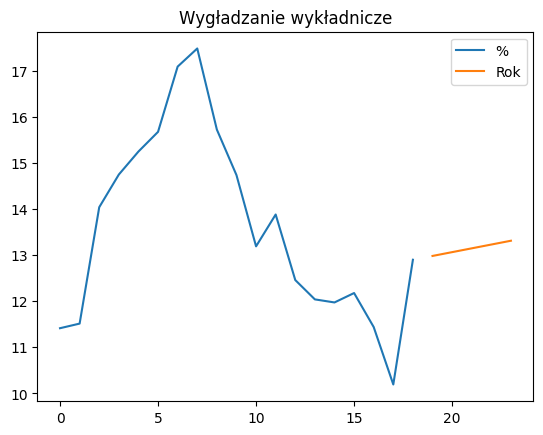

In [100]:
df = arrears_long
dane = df[(df['hhtyp']=='TOTAL') & (df['incgrp']=='TOTAL')].copy()
dane['value'] = pd.to_numeric(dane['value'])
y = dane.dropna().groupby("year")["value"].mean().reset_index(drop=True)

model = ExponentialSmoothing(y, trend='add').fit()
y_pred = model.fittedvalues
mse = mean_squared_error(y, y_pred)

forecast = model.forecast(5)
lata_f = range(int(y.index.max()) + 1, int(y.index.max()) + 6)

print(f"MSE: {mse:.4f}")

plt.plot(y.index, y, label="%")
plt.plot(lata_f, forecast, label="Rok")
plt.title("Wygładzanie wykładnicze")
plt.legend()
plt.show()